In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
#from geopandas import GeoDataFrame

fp = "non_general_shape/Geometrie_Wahlkreise_20DBT_VG250.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()


,WKR_NR,WKR_NAME,LAND_NR,LAND_NAME,geometry
0,1,Flensburg – Schleswig,01,Schleswig-Holstein,"POLYGON ((545529.753 6076163.750, 547088.171 6..."
1,2,Nordfriesland – Dithmarschen Nord,01,Schleswig-Holstein,"MULTIPOLYGON (((482885.442 6035583.826, 482821..."
2,3,Steinburg – Dithmarschen Süd,01,Schleswig-Holstein,"MULTIPOLYGON (((479877.791 5990290.587, 479947..."
3,4,Rendsburg-Eckernförde,01,Schleswig-Holstein,"POLYGON ((562696.788 6055939.030, 562735.531 6..."
4,5,Kiel,01,Schleswig-Holstein,"POLYGON ((576026.352 6032272.051, 576122.715 6..."


In [2]:
df_election = pd.read_csv("election_data/kerg.csv", sep=";", skiprows=2, header=[0,1,2], skipinitialspace=True)
# drop last column as it is empty
df_election = df_election.drop(df_election.columns[-1][0], axis=1)
columns = pd.DataFrame(df_election.columns.tolist())
for i in range(3):
    columns.loc[columns[i].str.startswith('Unnamed:'), i] = np.nan
    columns[i] = columns[i].fillna(method='ffill')
    mask = pd.isnull(columns[i])
    columns[i] = columns[i].fillna('')
#columns.loc[mask, [0,2]] = columns.loc[mask, [2,0]].values
df_election.columns = pd.MultiIndex.from_tuples(columns.to_records(index=False).tolist())
df_election.head()
#pd.MultiIndex.from_tuples(columns.to_records(index=False).tolist())

/Users/elgarno/PycharmProjects/Wahl2021/venv/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Nr                             Gebiet gehört zu Wahlberechtigte  \
                                                        Erststimmen   
                                                          Vorläufig   
0  1.0              Flensburg – Schleswig       1.0        231536.0   
1  2.0  Nordfriesland – Dithmarschen Nord       1.0        188352.0   
2  3.0       Steinburg – Dithmarschen Süd       1.0        176900.0   
3  4.0              Rendsburg-Eckernförde       1.0        202223.0   
4  5.0                               Kiel       1.0        202482.0   

                                        Wählende                          ...  \
             Zweitstimmen            Erststimmen            Zweitstimmen  ...   
  Vorperiode    Vorläufig Vorperiode   Vorläufig Vorperiode    Vorläufig  ...   
0   228471.0     231536.0   228471.0    180150.0   171914.0     180150.0  ...   
1   186568.0     188352.0   186568.0    145439.0   139194.0     145439.0  ...   
2   176636.0     176900.0   176636.0    136386.0   132017.0     136386.0  ...   
3   200831.0     202223.0   200831.0    162078.0   157354.0     162078.0  ...   
4   204650.0     202482.0   204650.0    156207.0   153273.0     156207.0  ...   

  Klimaliste Baden-Württemberg            Thüringer Heimatpartei             \
                  Zweitstimmen                       Erststimmen              
                     Vorläufig Vorperiode              Vorläufig Vorperiode   
0                          NaN        NaN                    NaN        NaN   
1                          NaN        NaN                    NaN        NaN   
2                          NaN        NaN                    NaN        NaN   
3                          NaN        NaN                    NaN        NaN   
4                          NaN        NaN                    NaN        NaN   

                               Übrige                                     
  Zweitstimmen            Erststimmen            Zweitstimmen             
     Vorläufig Vorperiode   Vorläufig Vorperiode    Vorläufig Vorperiode  
0          NaN        NaN         NaN      755.0          NaN      843.0  
1          NaN        NaN         NaN        0.0          NaN      430.0  
2          NaN        NaN         NaN        0.0          NaN      415.0  
3          NaN        NaN         NaN        0.0          NaN      584.0  
4          NaN        NaN         NaN      342.0          NaN      632.0  

[5 rows x 211 columns]

In [3]:
# create multiindex df in order to merge the map_df with df_election
map_df_multiindex = map_df.copy()
map_df_multiindex.columns = pd.MultiIndex.from_product([map_df_multiindex.columns, [''], ['']])
merged_df = map_df_multiindex.merge(df_election, how="left", left_on="WKR_NAME", right_on="Gebiet")
merged_df.head()

WKR_NR                           WKR_NAME LAND_NR           LAND_NAME  \
                                                                          
                                                                          
0      1              Flensburg – Schleswig      01  Schleswig-Holstein   
1      2  Nordfriesland – Dithmarschen Nord      01  Schleswig-Holstein   
2      3       Steinburg – Dithmarschen Süd      01  Schleswig-Holstein   
3      4              Rendsburg-Eckernförde      01  Schleswig-Holstein   
4      5                               Kiel      01  Schleswig-Holstein   

                                            geometry   Nr  \
                                                            
                                                            
0  POLYGON ((545529.753 6076163.750, 547088.171 6...  1.0   
1  MULTIPOLYGON (((482885.442 6035583.826, 482821...  2.0   
2  MULTIPOLYGON (((479877.791 5990290.587, 479947...  3.0   
3  POLYGON ((562696.788 6055939.030, 562735.531 6...  4.0   
4  POLYGON ((576026.352 6032272.051, 576122.715 6...  5.0   

                              Gebiet gehört zu Wahlberechtigte             \
                                                   Erststimmen              
                                                     Vorläufig Vorperiode   
0              Flensburg – Schleswig       1.0        231536.0   228471.0   
1  Nordfriesland – Dithmarschen Nord       1.0        188352.0   186568.0   
2       Steinburg – Dithmarschen Süd       1.0        176900.0   176636.0   
3              Rendsburg-Eckernförde       1.0        202223.0   200831.0   
4                               Kiel       1.0        202482.0   204650.0   

   ... Klimaliste Baden-Württemberg            Thüringer Heimatpartei  \
   ...                 Zweitstimmen                       Erststimmen   
   ...                    Vorläufig Vorperiode              Vorläufig   
0  ...                          NaN        NaN                    NaN   
1  ...                          NaN        NaN                    NaN   
2  ...                          NaN        NaN                    NaN   
3  ...                          NaN        NaN                    NaN   
4  ...                          NaN        NaN                    NaN   

                                          Übrige                          \
             Zweitstimmen            Erststimmen            Zweitstimmen   
  Vorperiode    Vorläufig Vorperiode   Vorläufig Vorperiode    Vorläufig   
0        NaN          NaN        NaN         NaN      755.0          NaN   
1        NaN          NaN        NaN         NaN        0.0          NaN   
2        NaN          NaN        NaN         NaN        0.0          NaN   
3        NaN          NaN        NaN         NaN        0.0          NaN   
4        NaN          NaN        NaN         NaN      342.0          NaN   

              
              
  Vorperiode  
0      843.0  
1      430.0  
2      415.0  
3      584.0  
4      632.0  

[5 rows x 216 columns]

In [4]:
merged_df[["WKR_NAME", "LAND_NAME", "geometry", "Wahlberechtigte"]]


WKR_NAME           LAND_NAME  \
                                                             
                                                             
0                Flensburg – Schleswig  Schleswig-Holstein   
1    Nordfriesland – Dithmarschen Nord  Schleswig-Holstein   
2         Steinburg – Dithmarschen Süd  Schleswig-Holstein   
3                Rendsburg-Eckernförde  Schleswig-Holstein   
4                                 Kiel  Schleswig-Holstein   
..                                 ...                 ...   
294           Zollernalb – Sigmaringen   Baden-Württemberg   
295                        Saarbrücken            Saarland   
296                          Saarlouis            Saarland   
297                         St. Wendel            Saarland   
298                            Homburg            Saarland   

                                              geometry Wahlberechtigte  \
                                                           Erststimmen   
                                                             Vorläufig   
0    POLYGON ((545529.753 6076163.750, 547088.171 6...        231536.0   
1    MULTIPOLYGON (((482885.442 6035583.826, 482821...        188352.0   
2    MULTIPOLYGON (((479877.791 5990290.587, 479947...        176900.0   
3    POLYGON ((562696.788 6055939.030, 562735.531 6...        202223.0   
4    POLYGON ((576026.352 6032272.051, 576122.715 6...        202482.0   
..                                                 ...             ...   
294  POLYGON ((484898.706 5362556.419, 484964.438 5...        182648.0   
295  POLYGON ((349405.878 5465822.765, 349885.030 5...        192929.0   
296  POLYGON ((347746.877 5497171.842, 347881.661 5...        203279.0   
297  POLYGON ((359840.989 5499356.064, 360105.639 5...        173074.0   
298  POLYGON ((376468.970 5473826.733, 376244.086 5...        185941.0   

                                        
               Zweitstimmen             
    Vorperiode    Vorläufig Vorperiode  
0     228471.0     231536.0   228471.0  
1     186568.0     188352.0   186568.0  
2     176636.0     176900.0   176636.0  
3     200831.0     202223.0   200831.0  
4     204650.0     202482.0   204650.0  
..         ...          ...        ...  
294   183588.0     182648.0   183588.0  
295   199885.0     192929.0   199885.0  
296   207501.0     203279.0   207501.0  
297   177468.0     173074.0   177468.0  
298   192410.0     185941.0   192410.0  

[299 rows x 7 columns]

In [5]:
merged_df_2021 = merged_df.drop('Vorperiode', axis=1, level=2)

In [6]:
merged_df_2021.columns = merged_df_2021.columns.droplevel(2)
merged_df_2021

WKR_NR                           WKR_NAME LAND_NR           LAND_NAME  \
                                                                            
0        1              Flensburg – Schleswig      01  Schleswig-Holstein   
1        2  Nordfriesland – Dithmarschen Nord      01  Schleswig-Holstein   
2        3       Steinburg – Dithmarschen Süd      01  Schleswig-Holstein   
3        4              Rendsburg-Eckernförde      01  Schleswig-Holstein   
4        5                               Kiel      01  Schleswig-Holstein   
..     ...                                ...     ...                 ...   
294    295           Zollernalb – Sigmaringen      08   Baden-Württemberg   
295    296                        Saarbrücken      10            Saarland   
296    297                          Saarlouis      10            Saarland   
297    298                         St. Wendel      10            Saarland   
298    299                            Homburg      10            Saarland   

                                              geometry     Nr  \
                                                                
0    POLYGON ((545529.753 6076163.750, 547088.171 6...    1.0   
1    MULTIPOLYGON (((482885.442 6035583.826, 482821...    2.0   
2    MULTIPOLYGON (((479877.791 5990290.587, 479947...    3.0   
3    POLYGON ((562696.788 6055939.030, 562735.531 6...    4.0   
4    POLYGON ((576026.352 6032272.051, 576122.715 6...    5.0   
..                                                 ...    ...   
294  POLYGON ((484898.706 5362556.419, 484964.438 5...  295.0   
295  POLYGON ((349405.878 5465822.765, 349885.030 5...  296.0   
296  POLYGON ((347746.877 5497171.842, 347881.661 5...  297.0   
297  POLYGON ((359840.989 5499356.064, 360105.639 5...  298.0   
298  POLYGON ((376468.970 5473826.733, 376244.086 5...  299.0   

                                Gebiet gehört zu Wahlberechtigte               \
                                                     Erststimmen Zweitstimmen   
0                Flensburg – Schleswig       1.0        231536.0     231536.0   
1    Nordfriesland – Dithmarschen Nord       1.0        188352.0     188352.0   
2         Steinburg – Dithmarschen Süd       1.0        176900.0     176900.0   
3                Rendsburg-Eckernförde       1.0        202223.0     202223.0   
4                                 Kiel       1.0        202482.0     202482.0   
..                                 ...       ...             ...          ...   
294           Zollernalb – Sigmaringen       8.0        182648.0     182648.0   
295                        Saarbrücken      10.0        192929.0     192929.0   
296                          Saarlouis      10.0        203279.0     203279.0   
297                         St. Wendel      10.0        173074.0     173074.0   
298                            Homburg      10.0        185941.0     185941.0   

     ... Familien-Partei Deutschlands              Graue Panther               \
     ...                  Erststimmen Zweitstimmen   Erststimmen Zweitstimmen   
0    ...                          NaN          NaN           NaN          NaN   
1    ...                          NaN          NaN           NaN          NaN   
2    ...                          NaN          NaN           NaN          NaN   
3    ...                          NaN          NaN           NaN          NaN   
4    ...                          NaN          NaN           NaN          NaN   
..   ...                          ...          ...           ...          ...   
294  ...                          NaN          NaN           NaN          NaN   
295  ...                          NaN          NaN           NaN          NaN   
296  ...                          NaN          NaN           NaN          NaN   
297  ...                          NaN          NaN           NaN          NaN   
298  ...                          NaN          NaN           NaN          NaN   

    Klimaliste Baden-Württemberg              Th

In [7]:
merged_df_2021_erststimmen = merged_df_2021.drop('Zweitstimmen', axis=1, level=1)
merged_df_2021_erststimmen.columns = merged_df_2021_erststimmen.columns.droplevel(1)
merged_df_2021_erststimmen.head()


,WKR_NR,WKR_NAME,LAND_NR,LAND_NAME,geometry,Nr,Gebiet,gehört zu,Wahlberechtigte,Wählende,...,UNABHÄNGIGE für bürgernahe Demokratie,Volt Deutschland,Ab jetzt...Demokratie durch Volksabstimmung - Politik für die Menschen,"bergpartei, die überpartei - ökoanarchistisch-realdadaistisches sammelbecken",DIE SONSTIGEN - X,Familien-Partei Deutschlands,Graue Panther,Klimaliste Baden-Württemberg,Thüringer Heimatpartei,Übrige
0,1,Flensburg – Schleswig,01,Schleswig-Holstein,"POLYGON ((545529.753 6076163.750, 547088.171 6...",1.0,Flensburg – Schleswig,1.0,231536.0,180150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Nordfriesland – Dithmarschen Nord,01,Schleswig-Holstein,"MULTIPOLYGON (((482885.442 6035583.826, 482821...",2.0,Nordfriesland – Dithmarschen Nord,1.0,188352.0,145439.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Steinburg – Dithmarschen Süd,01,Schleswig-Holstein,"MULTIPOLYGON (((479877.791 5990290.587, 479947...",3.0,Steinburg – Dithmarschen Süd,1.0,176900.0,136386.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Rendsburg-Eckernförde,01,Schleswig-Holstein,"POLYGON ((562696.788 6055939.030, 562735.531 6...",4.0,Rendsburg-Eckernförde,1.0,202223.0,162078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kiel,01,Schleswig-Holstein,"POLYGON ((576026.352 6032272.051, 576122.715 6...",5.0,Kiel,1.0,202482.0,156207.0,...,NaN,671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


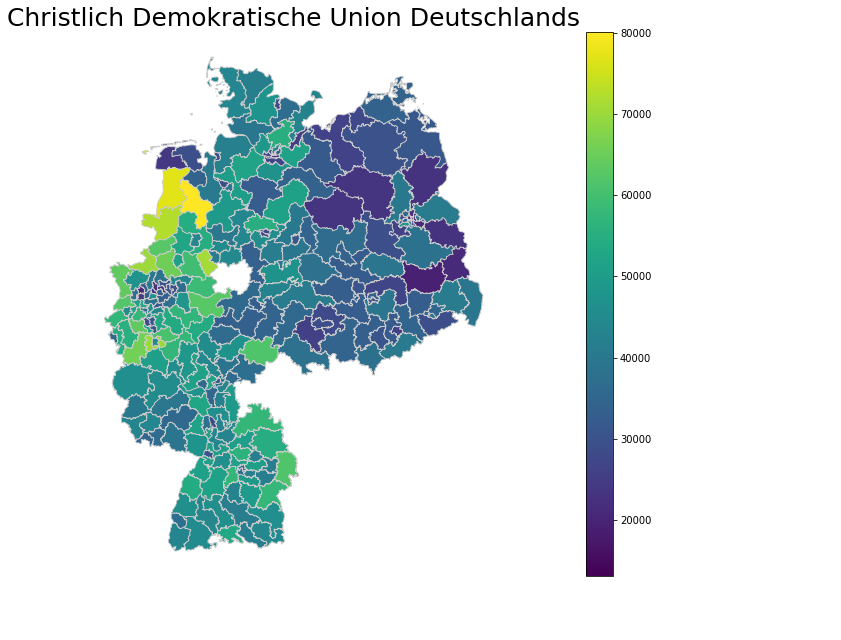

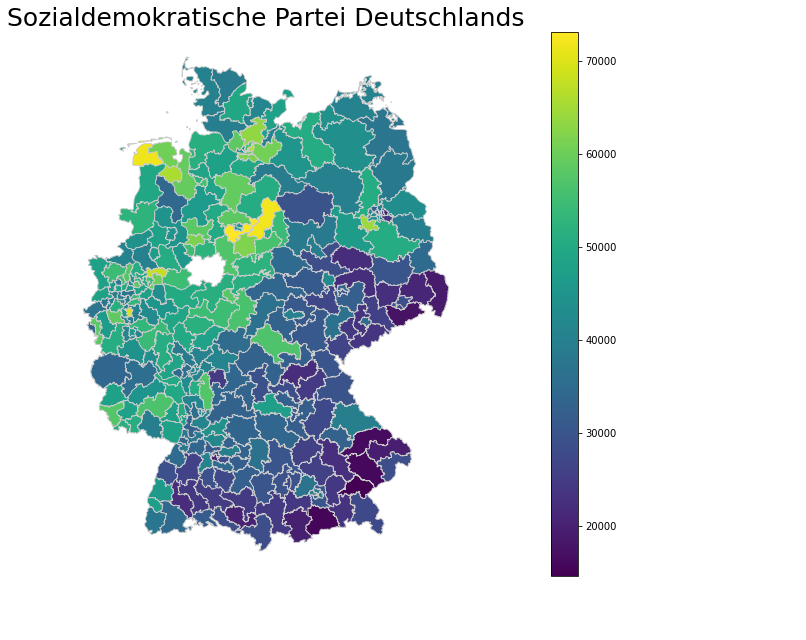

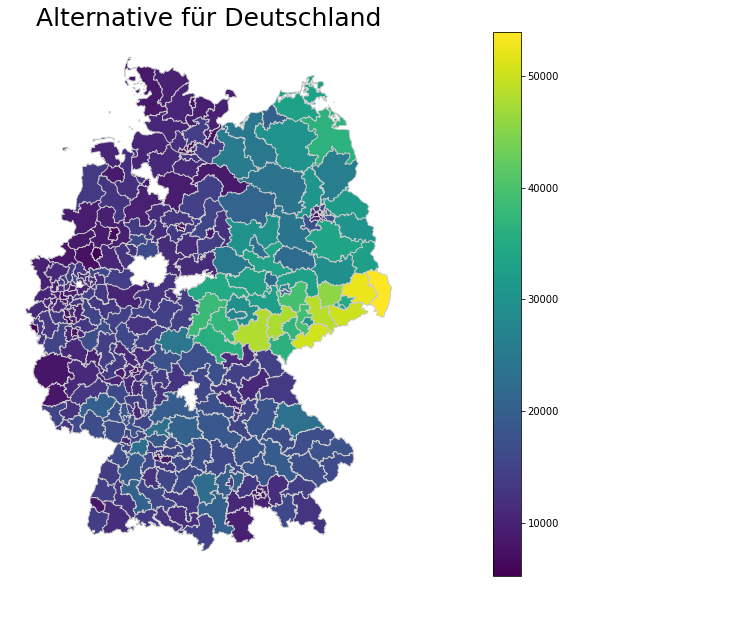

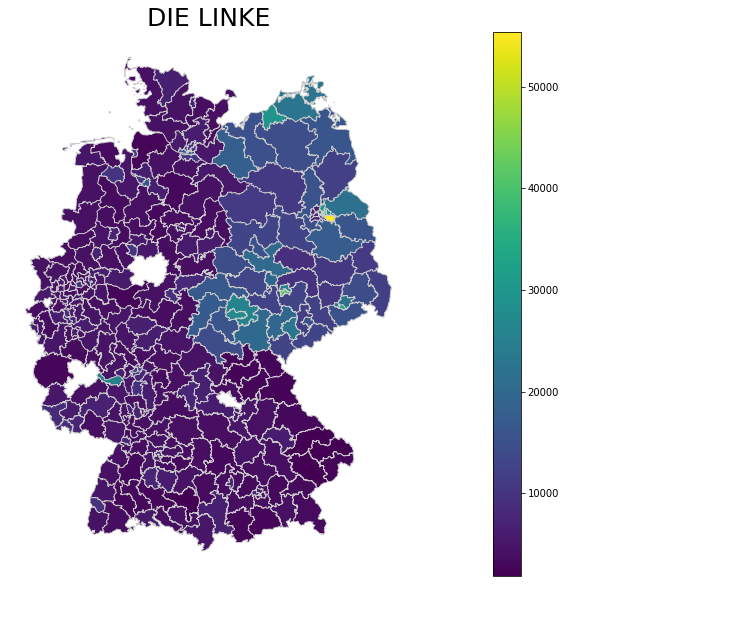

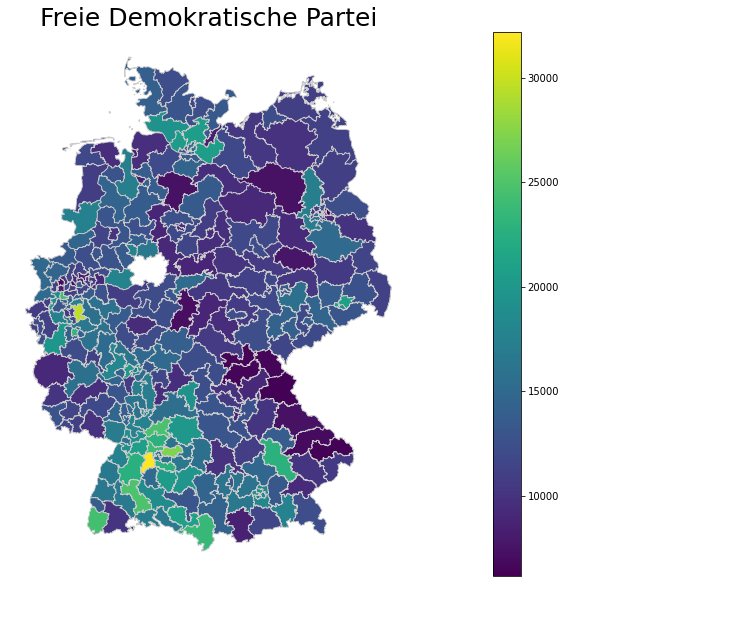

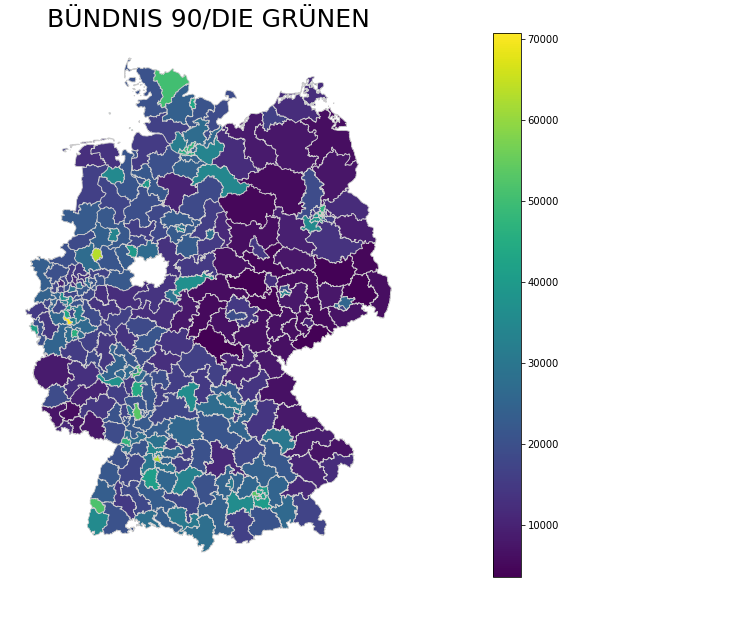

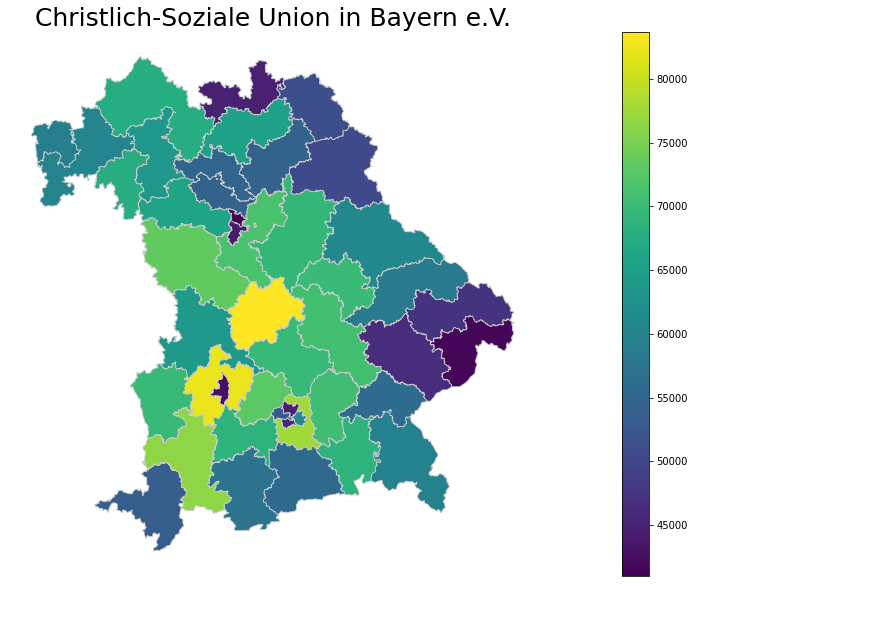

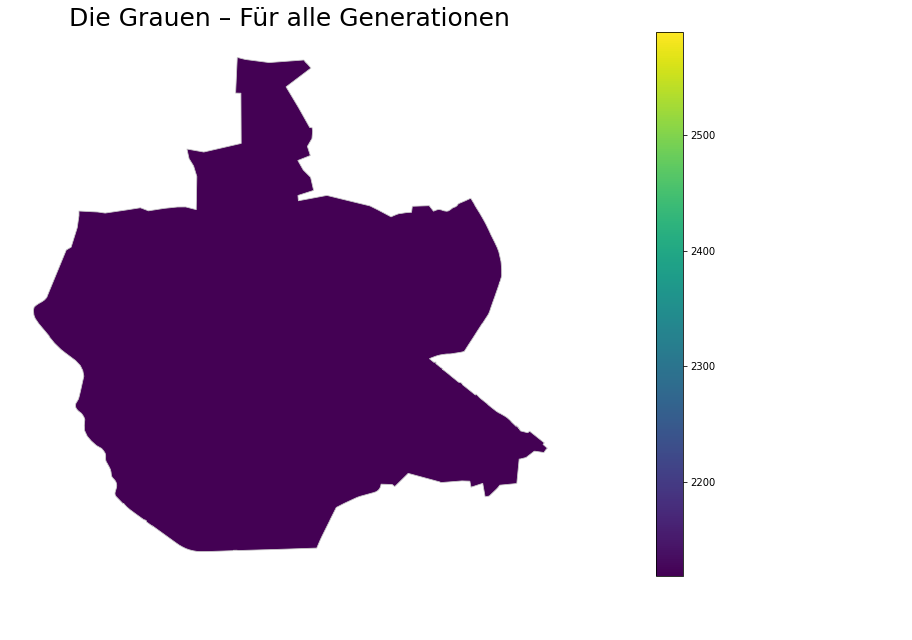

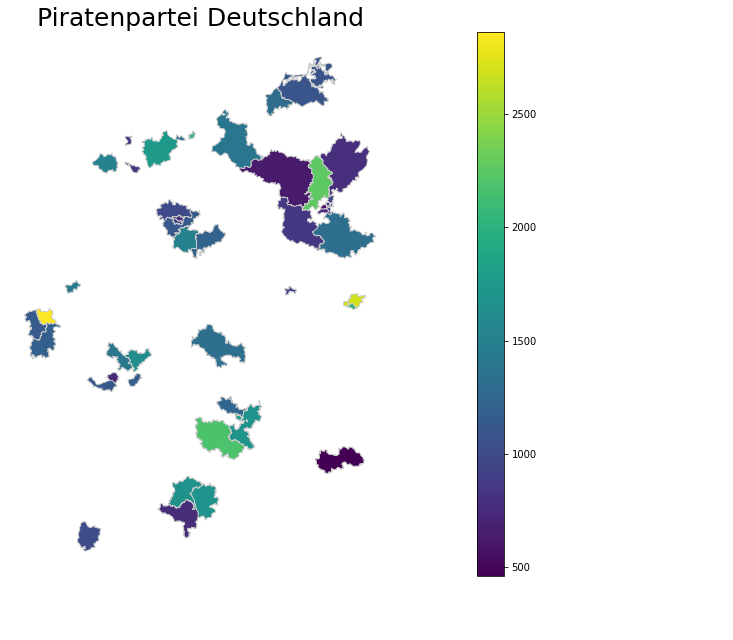

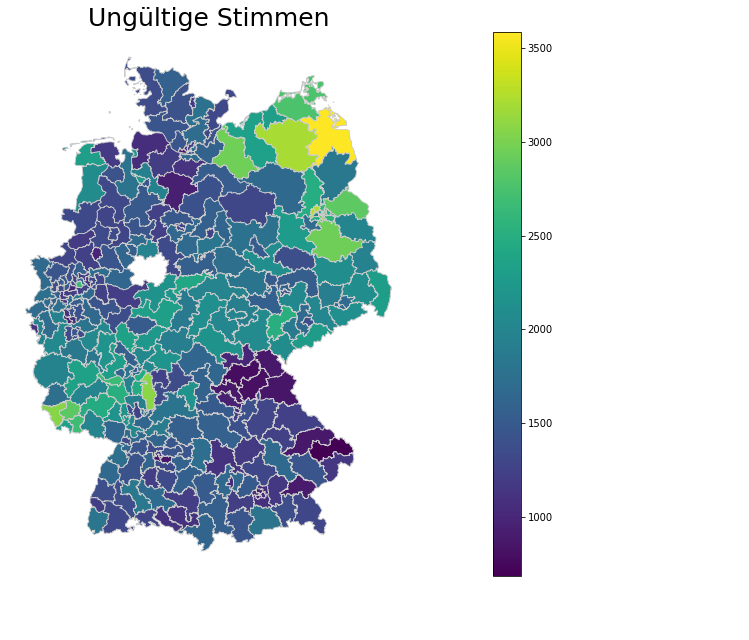

In [8]:
# set the value column that will be visualised
parteien = ['Christlich Demokratische Union Deutschlands', 'Sozialdemokratische Partei Deutschlands', 'Alternative für Deutschland', 'DIE LINKE', 'Freie Demokratische Partei', 'BÜNDNIS 90/DIE GRÜNEN', 'Christlich-Soziale Union in Bayern e.V.', 'Die Grauen – Für alle Generationen', 'Piratenpartei Deutschland', 'Ungültige Stimmen']

for variable in parteien:
    # set the range for the choropleth values
    vmax = merged_df_2021_erststimmen[variable].max()
    vmin = merged_df_2021_erststimmen[variable].min()

    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(30, 10))
    # remove the axis
    ax.axis('off')
    # add a title and annotation
    ax.set_title(f'{variable}', fontdict={'fontsize': '25', 'fontweight' : '3'})
    ax.annotate('Source: Bundeswahlleiter - https://www.bundeswahlleiter.de/bundestagswahlen/2021/ergebnisse/opendata', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
    # Create colorbar legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
    # add the colorbar to the figure
    fig.colorbar(sm)
    # create map
    merged_df_2021_erststimmen.plot(column=variable, linewidth=0.8, ax=ax, edgecolor='0.8')


In [9]:
merged_df_2021.columns.tolist()


[('WKR_NR', ''),
 ('WKR_NAME', ''),
 ('LAND_NR', ''),
 ('LAND_NAME', ''),
 ('geometry', ''),
 ('Nr', ''),
 ('Gebiet', ''),
 ('gehört zu', ''),
 ('Wahlberechtigte', 'Erststimmen'),
 ('Wahlberechtigte', 'Zweitstimmen'),
 ('Wählende', 'Erststimmen'),
 ('Wählende', 'Zweitstimmen'),
 ('Ungültige Stimmen', 'Erststimmen'),
 ('Ungültige Stimmen', 'Zweitstimmen'),
 ('Gültige Stimmen', 'Erststimmen'),
 ('Gültige Stimmen', 'Zweitstimmen'),
 ('Christlich Demokratische Union Deutschlands', 'Erststimmen'),
 ('Christlich Demokratische Union Deutschlands', 'Zweitstimmen'),
 ('Sozialdemokratische Partei Deutschlands', 'Erststimmen'),
 ('Sozialdemokratische Partei Deutschlands', 'Zweitstimmen'),
 ('Alternative für Deutschland', 'Erststimmen'),
 ('Alternative für Deutschland', 'Zweitstimmen'),
 ('Freie Demokratische Partei', 'Erststimmen'),
 ('Freie Demokratische Partei', 'Zweitstimmen'),
 ('DIE LINKE', 'Erststimmen'),
 ('DIE LINKE', 'Zweitstimmen'),
 ('BÜNDNIS 90/DIE GRÜNEN', 'Erststimmen'),
 ('BÜNDNIS 

In [10]:
merged_df_2021


WKR_NR                           WKR_NAME LAND_NR           LAND_NAME  \
                                                                            
0        1              Flensburg – Schleswig      01  Schleswig-Holstein   
1        2  Nordfriesland – Dithmarschen Nord      01  Schleswig-Holstein   
2        3       Steinburg – Dithmarschen Süd      01  Schleswig-Holstein   
3        4              Rendsburg-Eckernförde      01  Schleswig-Holstein   
4        5                               Kiel      01  Schleswig-Holstein   
..     ...                                ...     ...                 ...   
294    295           Zollernalb – Sigmaringen      08   Baden-Württemberg   
295    296                        Saarbrücken      10            Saarland   
296    297                          Saarlouis      10            Saarland   
297    298                         St. Wendel      10            Saarland   
298    299                            Homburg      10            Saarland   

                                              geometry     Nr  \
                                                                
0    POLYGON ((545529.753 6076163.750, 547088.171 6...    1.0   
1    MULTIPOLYGON (((482885.442 6035583.826, 482821...    2.0   
2    MULTIPOLYGON (((479877.791 5990290.587, 479947...    3.0   
3    POLYGON ((562696.788 6055939.030, 562735.531 6...    4.0   
4    POLYGON ((576026.352 6032272.051, 576122.715 6...    5.0   
..                                                 ...    ...   
294  POLYGON ((484898.706 5362556.419, 484964.438 5...  295.0   
295  POLYGON ((349405.878 5465822.765, 349885.030 5...  296.0   
296  POLYGON ((347746.877 5497171.842, 347881.661 5...  297.0   
297  POLYGON ((359840.989 5499356.064, 360105.639 5...  298.0   
298  POLYGON ((376468.970 5473826.733, 376244.086 5...  299.0   

                                Gebiet gehört zu Wahlberechtigte               \
                                                     Erststimmen Zweitstimmen   
0                Flensburg – Schleswig       1.0        231536.0     231536.0   
1    Nordfriesland – Dithmarschen Nord       1.0        188352.0     188352.0   
2         Steinburg – Dithmarschen Süd       1.0        176900.0     176900.0   
3                Rendsburg-Eckernförde       1.0        202223.0     202223.0   
4                                 Kiel       1.0        202482.0     202482.0   
..                                 ...       ...             ...          ...   
294           Zollernalb – Sigmaringen       8.0        182648.0     182648.0   
295                        Saarbrücken      10.0        192929.0     192929.0   
296                          Saarlouis      10.0        203279.0     203279.0   
297                         St. Wendel      10.0        173074.0     173074.0   
298                            Homburg      10.0        185941.0     185941.0   

     ... Familien-Partei Deutschlands              Graue Panther               \
     ...                  Erststimmen Zweitstimmen   Erststimmen Zweitstimmen   
0    ...                          NaN          NaN           NaN          NaN   
1    ...                          NaN          NaN           NaN          NaN   
2    ...                          NaN          NaN           NaN          NaN   
3    ...                          NaN          NaN           NaN          NaN   
4    ...                          NaN          NaN           NaN          NaN   
..   ...                          ...          ...           ...          ...   
294  ...                          NaN          NaN           NaN          NaN   
295  ...                          NaN          NaN           NaN          NaN   
296  ...                          NaN          NaN           NaN          NaN   
297  ...                          NaN          NaN           NaN          NaN   
298  ...                          NaN          NaN           NaN          NaN   

    Klimaliste Baden-Württemberg              Th